# Regression using Sklearn

# Lecture 19 - Regression Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Training Data Pre-processing

In [1]:
df = pd.read_csv(r'C:/Users\Rao Hammad Raza/OneDrive/Pictures/Python ka chilla vs/USA_Housing (1).csv')

NameError: name 'pd' is not defined

In [8]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [9]:
# Data shape
print('train data', df.shape)

train data (5000, 7)


In [10]:
# View first few rows
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [11]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Missing Data

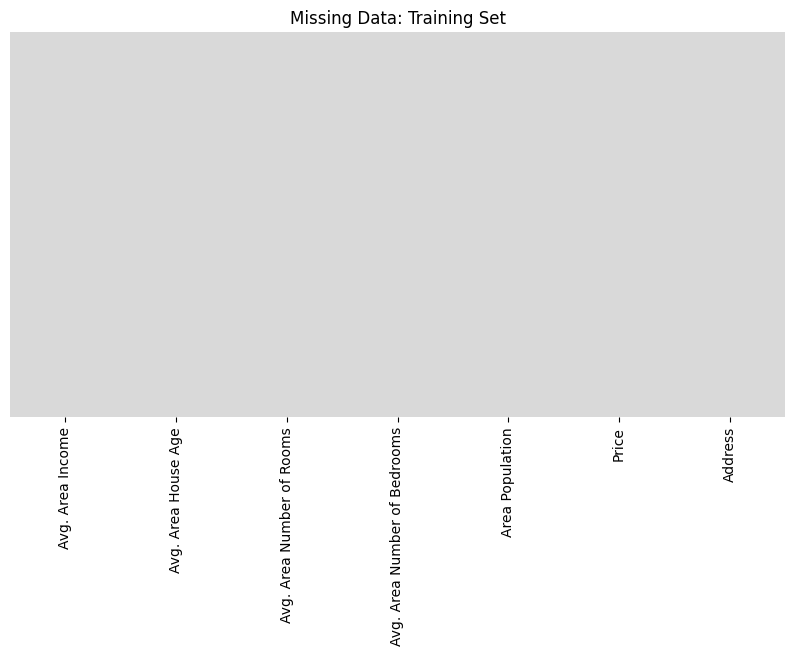

In [12]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [13]:
# Remove Address feature
df.drop('Address', axis = 1 , inplace= True)

In [14]:
# Remove rows with missing data
df.dropna(inplace= True)

In [15]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Numeric Features

In [16]:
# Numeric summary
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Getting Model Ready

In [17]:
# Shape of train data
df.shape

(5000, 6)

# Target Variable Splitting

In [18]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('Price', axis=1) # grabs everything else but 'price'ArithmeticError

# Create target variable
y = df['Price'] # y is the column we're trying to predict

In [19]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [21]:
# X Represent the Features
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [22]:
# y represents the Target
y.shape

(5000,)

In [23]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size= .10, random_state= 101)

# Linear Regression

Model Training

In [24]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

# Model Testing
Class Prediction

In [28]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500,)
[1257098.09685349  822086.76211938 1739484.60206384  973128.9269703
  993918.45735573  645734.60078803 1074412.81648685  856463.98369062
 1445048.63352694 1201847.71924782 1454475.51805013 1296582.98910134
 1736858.04511704 1336694.59015483 1386280.00636484 1223122.34992068
  615840.7860361   964515.62334817 1222020.63802963 1197532.31828304
  506756.96702134 1767894.37065039 1854829.42630351 1198521.37525139
 1065384.60130188 1810199.62960618 1767830.26189968 1440162.9747667
 1386122.51652193 1539972.94909227  729561.93190619 1754434.69364763
 1465273.07428251 1026021.79840116 1283514.57970667  917688.32850804
 1185681.03610736 1000137.89595728 1329344.79847155  784262.29954368
 1392528.47637802  576569.30274928  823465.14446257 1893895.24014477
 1671565.73974773  964720.06183539 1129280.90868273  792574.96874635
 1159381.43948676 1473209.24685792 1459527.31772498 1164492.85979007
 1098752.99065475 1360158.14296951  843194.09463543  985298.51640372
 1123531.58586396 1252412.096

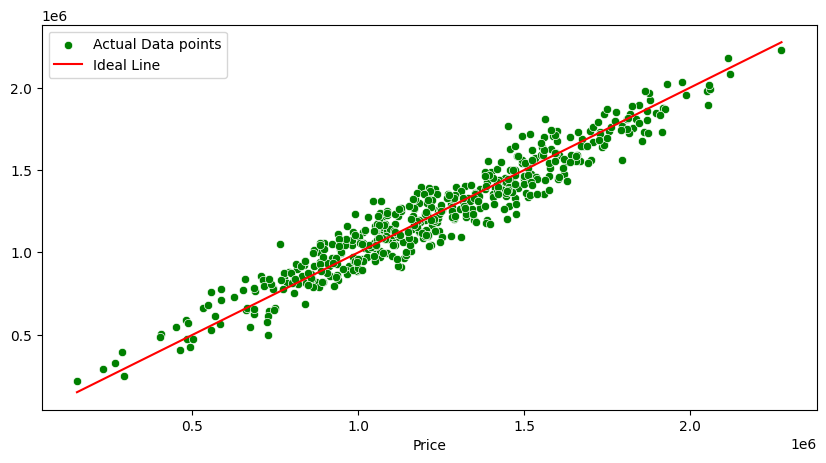

In [29]:
sns.scatterplot(x=y_test, y=y_pred, color = 'Green', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [32]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1251688.62 |    1257098.10
     873048.32 |     822086.76
    1696977.66 |    1739484.60
    1063964.29 |     973128.93
     948788.28 |     993918.46
     730043.65 |     645734.60
    1166925.15 |    1074412.82
     705444.12 |     856463.98
    1499988.88 |    1445048.63
    1288199.15 |    1201847.72
    1441736.76 |    1454475.52
    1279681.15 |    1296582.99
    1754969.16 |    1736858.05
    1511653.45 |    1336694.59
    1441956.20 |    1386280.01
    1119992.62 |    1223122.35
     727866.53 |     615840.79
    1138885.10 |     964515.62
    1074263.32 |    1222020.64
    1386473.37 |    1197532.32
     404643.60 |     506756.97
    1449829.49 |    1767894.37
    1775874.76 |    1854829.43
    1202050.58 |    1198521.38
    1105737.46 |    1065384.60
    1835564.69 |    1810199.63
    1795428.77 |    1767830.26
    1424283.37 |    1440162.97
    1365945.08 |    1386122.52
    1492011.50 |    1539972.95
     

# Residual Analysis

In [33]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-4.47976991e+05 -1.29656563e+04 -9.30363496e+05 -1.64007821e+05
 -1.84797352e+05  1.63386505e+05 -2.65291711e+05 -4.73428778e+04
 -6.35927528e+05 -3.92726613e+05 -6.45354412e+05 -4.87461883e+05
 -9.27736939e+05 -5.27573484e+05 -5.77158901e+05 -4.14001244e+05
  1.93280320e+05 -1.55394518e+05 -4.12899532e+05 -3.88411212e+05
  3.02364139e+05 -9.58773265e+05 -1.04570832e+06 -3.89400269e+05
 -2.56263495e+05 -1.00107852e+06 -9.58709156e+05 -6.31041869e+05
 -5.77001411e+05 -7.30851843e+05  7.95591739e+04 -9.45313588e+05
 -6.56151968e+05 -2.16900693e+05 -4.74393474e+05 -1.08567223e+05
 -3.76559930e+05 -1.91016790e+05 -5.20223693e+05  2.48588063e+04
 -5.83407371e+05  2.32551803e+05 -1.43440386e+04 -1.08477413e+06
 -8.62444634e+05 -1.55598956e+05 -3.20159803e+05  1.65461371e+04
 -3.50260334e+05 -6.64088141e+05 -6.50406212e+05 -3.55371754e+05
 -2.89631885e+05 -5.51037037e+05 -3.40729888e+04 -1.76177411e+05
 -3.14410480e+05 -4.43290991e+05 -6.17494513e+05  3.09119767e+05
 -6.52248349e+05 -2.97038

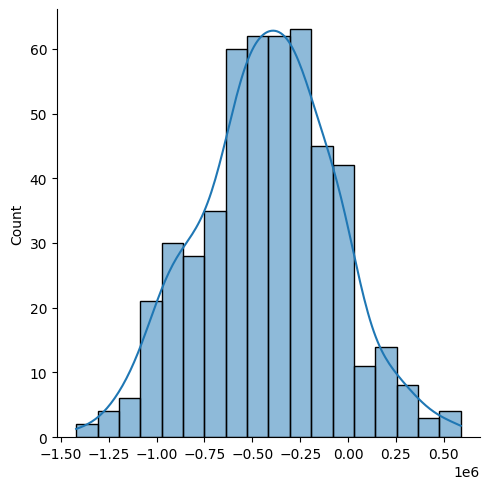

In [35]:
# Distribution plot for Residual (differnect between actual and predicted values)
sns.displot(residual, kde = True)

# Model Evaluation
Linear Regression

In [36]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 9839952411.801708
Root Mean Squared Error: 99196.53427313732


In [38]:
s = 10100187858 - 9839952411
print(s)

260235447


In [39]:
y_train.shape

(4500,)

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  30542025245.84113


# Random Forest

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

# Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
# Random Forest Regression Accuracy with test set
print('Random Forest Regressor : ', RFr)

Random Forest Regressor :  14070843223.69357


# Gradient Boosting Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  12061732110.870459


In [45]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 9839952411.801708,
    "Descison Tree": 30542025245.84113,
    "Random Forest": 14070843223.69357,
    "Gradient Boosting": 12061732110.870459

}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranknig of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. Linear Regression: 9839952411.801708
2. Gradient Boosting: 12061732110.870459
3. Random Forest: 14070843223.69357
4. Descison Tree: 30542025245.84113
